## 予測の誤差を生む要因。
- バイアス
    モデルの表現力が低いことによる誤差。3次で回帰すべきところを1次で行なっている場合など。データの特徴を捉えられていない（未学習）。
- ノイズ
    データに乗るもの。ノイズかそうでないかは区別できないため、データとして受け入れなくてはならない。
- バリアンス
    モデルの表現力が大きすぎて意味のない特徴まで捉えてしまっている状態(過学習)。

## 過学習の原因

- 重みパラメータの絶対値が極端に大きくなっている状態。データ一つ一つにフィットしようとした結果こうなる傾向にある。
- サンプルに対して説明変数が多すぎる。調整すべきパラメータの増加、多重共線性の可能性。
    

- 過学習の場合trainデータの誤差関数が、汎化性能を高める上で悪い点になっている。
- 本来誤差関数があるべき分布からずれている。
- パラメータが原点から遠くの方向にずれる傾向にある(経験的)。ぐにゃぐにゃの関数。
- より原点に近いところに引き止める必要がある。これが正則化。
- 正則化の式は距離の制限。
- 誤差関数の最適な重みというより、本来あるべき極小値のところに止まるだろう。

- w1,w2の空間で考えると原点からの距離が重みの大きさを表している。


## L2ノルムを利用する場合 Ridge回帰

## L1ノルムを利用する場合LASSO回帰
自動的に次元を削減する。
LASSOの解が座標軸状に落ち着くことが多い。誤差関数が変な形でなければ。<br>
何かしらのパラメータを0にしている。回帰式への影響がなくなる。<br>
スパースな解が得られる。スパースなデータ分析に向いている。
LASSOで正則化→解が軸上→変数を自動で削減→スパースなデータはいらない変数が多い

## LASSOでは次元削減の効果が強すぎる場合
Elastic Netを使用する。

In [2]:
# 必要なライブラリを読み込み
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# 適当なデータセットを生成
# 中のコードは気にしなくていいので､今回はグラフだけ眺めてください

# 適当な三次関数を出力する関数を定義
def cubic(X):
    y = 0.0001 * (X**3 + X**2 + X + 1)
    return y

# サンプルデータの生成
np.random.seed(3)                         # 乱数生成器の状態を指定
X = np.random.normal(0, 10, 30)           # 正規分布に従って30個のデータ点を生成
y = cubic(X)                              # 対応するyを三次関数で指定
y += np.random.normal(0, 0.25, len(y))    # 正規分布に従うノイズを加える
X = X.reshape(-1, 1)                      # sklearnで扱えるように､一列のベクトルに変換

# 三次関数をプロットする用のデータを生成
X_plot = np.arange(-25, 25, 0.1)          # -25~+25の範囲に､0.1刻みでデータ点を取る
y_plot = cubic(X_plot)                    # 対応するyを三次関数で指定
X_plot = X_plot.reshape(-1, 1)            # sklearnで扱えるように､一行のベクトルに変換

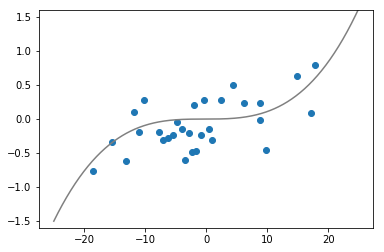

In [4]:
# グラフを描画
plt.scatter(X, y)                         # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')    # もととなる三次関数を描画
plt.ylim([-1.6, 1.6])                     # 縦の表示範囲を指定
plt.show()                                # グラフを表

In [5]:
#7次関数で回帰　バリアンスが大きい
from sklearn.linear_model import LinearRegression    # 線形回帰のクラス
from sklearn.preprocessing import PolynomialFeatures # 多項式変換のクラス
lr = LinearRegression()                              # 線形回帰のインスタンスを生成
pol = PolynomialFeatures(degree=7)                   # 7次関数用に特徴量を変換するインスタンスを生成
X_pol = pol.fit_transform(X)                         # Xを7次関数用に変換
lr.fit(X_pol, y)                                     # 変換したデータを学習させる
X_plot_pol = pol.fit_transform(X_plot)               # プロット用のデータも同様に変換
y_plot_pol = lr.predict(X_plot_pol)                  # プロット用のデータのyを予測

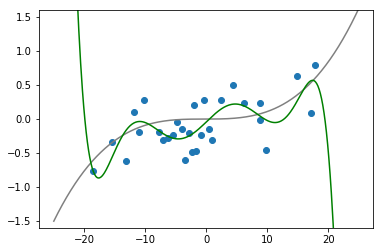

In [6]:
# グラフを描画
plt.scatter(X, y)                                    # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')               # もととなる三次関数を描画
plt.plot(X_plot, y_plot_pol, color='green')          # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                # 縦の表示範囲を指定
plt.show()                                           # グラフを描画

完全に過学習している

In [13]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1000) #alpha=L2ノルムの罰則の強さ
ridge_model.fit(X_pol,y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

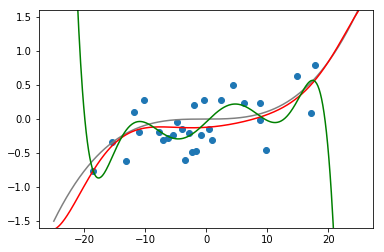

In [14]:
# グラフを描画
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(X_plot, ridge_model.predict(X_plot_pol), color='red') # Ridge回帰によるモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')                    # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()                                                     # グラフを描画

In [15]:
#重みパラメータを表示　
ridge_model.coef_

array([  0.00000000e+00,   6.00178293e-03,   1.35634933e-03,
         1.14754021e-06,  -5.17185214e-06,   4.16096324e-07,
         5.24302212e-09,  -4.29044302e-10])

In [16]:
#罰則なし
lr.coef_

array([  0.00000000e+00,   8.65504973e-02,   4.11571234e-04,
        -1.64948411e-03,  -4.05575048e-06,   9.48940782e-06,
         5.18992808e-09,  -1.49851211e-08])

In [19]:
# L2ノルムの値を出力　
from numpy import linalg as LA
print(LA.norm(lr.coef_))
print(LA.norm(ridge_model.coef_))

0.086567192885
0.00615313822769


In [24]:
from sklearn.linear_model import Lasso #Lassoは変数選択を自動で行う→いくつかの変数で係数が０になりやすい
lasso_model=Lasso(alpha=1000)
lasso_model.fit(X_pol,y)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

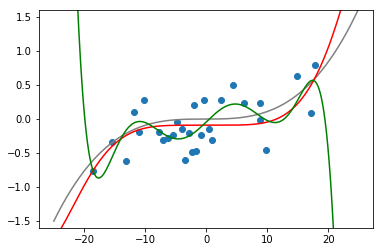

In [25]:
# グラフを描画
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(X_plot, lasso_model.predict(X_plot_pol), color='red') # Ridge回帰によるモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')                    # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()                                                     # グラフを描画

In [26]:
#LASSOで変数選択が行われているかどうか
#データ生成の元になっている関数は３次だが、0次〜３次の係数が0になっているのは、おそらくデータのせい。
#データのノイズおよび量では以下の係数が最適だったということ。
lasso_model.coef_　#LASSOの恩恵を感じるにはこれをしなくてはいけない

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.84889999e-07,
         2.03058492e-09,  -4.20064051e-10])

In [27]:
LA.norm(lasso_model.coef_)　#LASSOの恩恵を感じるにはこれをしなくてはいけない

4.8489443265010682e-07

In [37]:
from sklearn.linear_model import ElasticNet #変数選択の強さがLassoよりやや小さい 
elastic_model=ElasticNet(alpha=1000, l1_ratio=0.9) # l1_ratioも指定する。
elastic_model.fit(X_pol,y)

ElasticNet(alpha=1000, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

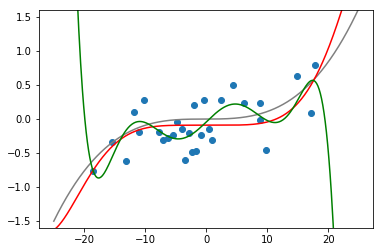

In [38]:
# グラフを描画
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(X_plot, elastic_model.predict(X_plot_pol), color='red') # Ridge回帰によるモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')                    # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()                                                     # グラフを描画

In [39]:
elastic_model.coef_ 

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   5.00299266e-07,
         1.98532010e-09,  -4.68508620e-10])

In [40]:
LA.norm(elastic_model.coef_)

5.0030342442003446e-07

In [42]:
LA.norm(elastic_model.coef_,ord=1) #L1ノルム

5.0275309464862551e-07